# This file is used to analyze real experiment data collected in December of 2022
Individual data analysis

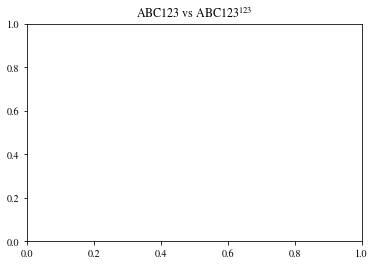

In [55]:
import pandas as pd
import numpy as np
import sys
import copy

import matplotlib.pyplot as plt
%matplotlib inline
# To change the default font like latex font
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')
# Selecting colors
import seaborn as sns

palette_tab20 = sns.color_palette("tab20", 20)

# Tried to use this to estimate the strategies used in L environment

conditional strategies based on categories suggested by Fallucchi2019 and  Fischbacher et  al. (2001)( Don't know how to define the hump-shaped contributor, move from the current analysis for now. 

1. self-interest: 0 for all other contribution
2. Strong conditional cooperators: 1-1 
3. weak conditional cooperators: 1/2 of other contribution
4. altruist: all in
5. hump-shaped contributors (non-monotonic)

In [2]:
data_ABA= pd.read_csv('..\\ProcessedData\\data_ABA.csv')
data_BAB=pd.read_csv('..\\ProcessedData\\data_BAB.csv')

# Data with opportunity 
data_Oppor_B1 = pd.read_csv('..\\ProcessedData\\data_Oppor_B1.csv')
data_Oppor_allB = pd.read_csv('..\\ProcessedData\\data_Oppor_allB.csv')

# Data local only 
data_noOppor_AllA = pd.read_csv('..\\ProcessedData\\data_noOppor_AllA.csv')
data_noOppor_A2=pd.read_csv('..\\ProcessedData\\data_noOppor_A2.csv')

data_noOppor_AllA = data_noOppor_AllA.sort_values(by=['participant.code', 'Sequence', 'subsession.period'])

In [30]:
# data_noOppor_AllA.columns
# data_Oppor_allB['subsession.period'].unique()
data_Oppor_allB.columns

Index(['subsession.round_number', 'subsession.period', 'subsession.sg',
       'player.id_in_group', 'player.endowment', 'player.join_club',
       'player.local_community', 'player.id_in_local',
       'player.contribution_local', 'player.contribution_global',
       'player.total_contribution_local', 'player.individual_share_local',
       'player.payoff', 'group.id_in_subsession', 'group.FC',
       'group.total_contribution_global', 'group.individual_share_global',
       'session.code', 'Treatment', 'FC', 'participant.code', 'endowment',
       'endowment_j', 'endowment_nj', 'tot_contr', 'privateAcc',
       'FC_globalagg', 'player.payoff_globalagg', 'player.endowment_globalagg',
       'Efficiency', 'player.payoff_globalMax', 'ClubTotal', 'LocalTotal',
       'ClubSize', 'SocialBenefitMax', 'Efficiency2', 'Sequence'],
      dtype='object')

In [34]:
data_Oppor_allB['player.endowment'].unique()

array([280., 300.,  80., 220.,  20., 100., 180., 200., 120.])

## Draw Contribution Share distribution

In [26]:
# Environment L: focus on the first 10 rounds

Local = data_noOppor_AllA[data_noOppor_AllA['subsession.period']<=10]
Local['LocalShare'] = Local['tot_contr'] / Local['player.endowment'] *10 * 100
LocalP = Local.groupby(['participant.code', 'Treatment'])['LocalShare'].mean().reset_index()

C:\Users\xinxi\AppData\Local\Temp/ipykernel_16768/2238542020.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Local['LocalShare'] = Local['tot_contr'] / Local['player.endowment'] *10 * 100


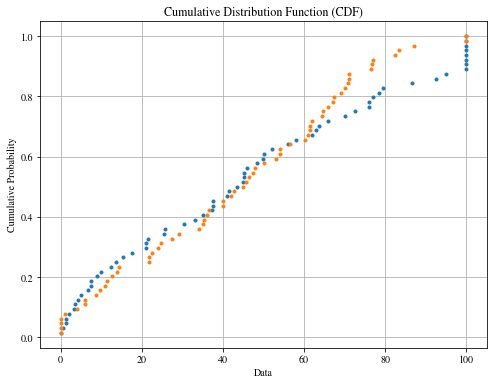

In [29]:
# Draw CDF

# Plot the CDF
plt.figure(figsize=(8, 6))


# Calculate the cumulative distribution function (CDF)
for t in ['HOMO', 'HETERO']:
    data = LocalP[LocalP['Treatment']==t]['LocalShare']
    sorted_data = np.sort(data)
    y_cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, y_cdf, label=t, marker='.', linestyle='none')


    
plt.xlabel('Data')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF)')
plt.grid(True)
plt.show()

In [54]:
# Environment LG: focus on the first 10 rounds

Global = data_Oppor_allB[data_Oppor_allB['subsession.period']<=10]
Global['TotalShare'] = Global['tot_contr'] / Global['player.endowment'] *10 * 100
Global['GlobalShare'] = Global['player.contribution_global'] / Global['player.endowment'] *10 * 100
Global['Treatment_4']= 'Homogeneous\nLowC'
Global.loc[(Global['Treatment']=='HOMO') & (Global['FC']==80),'Treatment_4'] = "Homogeneous\nHighC"
Global.loc[(Global['Treatment']=='HETERO') & (Global['FC']==20),'Treatment_4'] = "Heterogeneous\nLowC"
Global.loc[(Global['Treatment']=='HETERO') & (Global['FC']==80),'Treatment_4'] = "Heterogeneous\nHighC"
GlobalP = Global.groupby(['participant.code', 'Treatment_4', 'Treatment','FC'])['GlobalShare','TotalShare'].mean().reset_index()

C:\Users\xinxi\AppData\Local\Temp/ipykernel_16768/3141091554.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Global['TotalShare'] = Global['tot_contr'] / Global['player.endowment'] *10 * 100
C:\Users\xinxi\AppData\Local\Temp/ipykernel_16768/3141091554.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Global['GlobalShare'] = Global['player.contribution_global'] / Global['player.endowment'] *10 * 100
C:\Users\xinxi\AppData\Local\Temp/ipykernel_16768/3141091554.py:6: SettingWithCopyWarning: 
A value is t

In [75]:
GlobalP['GlobalShare'].unique().max()

95.41666666666667

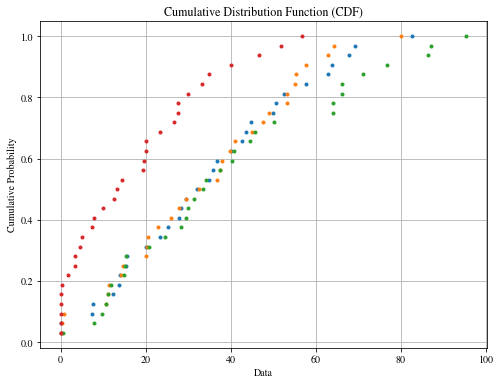

In [38]:
# Draw CDF

# Plot the CDF
plt.figure(figsize=(8, 6))


# Calculate the cumulative distribution function (CDF)
for t in ['HOMO', 'HETERO']:
    for fc in [20, 80]:
        data = GlobalP[(GlobalP['Treatment']==t) & (GlobalP['FC']==fc) ]['GlobalShare']
        sorted_data = np.sort(data)
        y_cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
        plt.plot(sorted_data, y_cdf, label=t+str(fc), marker='.', linestyle='none')


    
plt.xlabel('Data')
plt.ylabel('Cumulative Probability')
plt.title('Global Contribution Shares (CDF)')
plt.grid(True)
plt.show()

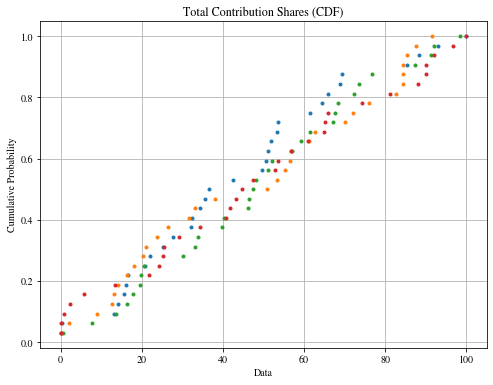

In [41]:
# Draw CDF

# Plot the CDF
plt.figure(figsize=(8, 6))


# Calculate the cumulative distribution function (CDF)
for t in ['HOMO', 'HETERO']:
    for fc in [20, 80]:
        data = GlobalP[(GlobalP['Treatment']==t) & (GlobalP['FC']==fc) ]['TotalShare']
        sorted_data = np.sort(data)
        y_cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
        plt.plot(sorted_data, y_cdf, label=t+str(fc), marker='.', linestyle='none')


    
plt.xlabel('Data')
plt.ylabel('Cumulative Probability')
plt.title('Total Contribution Shares (CDF)')
plt.grid(True)
plt.show()

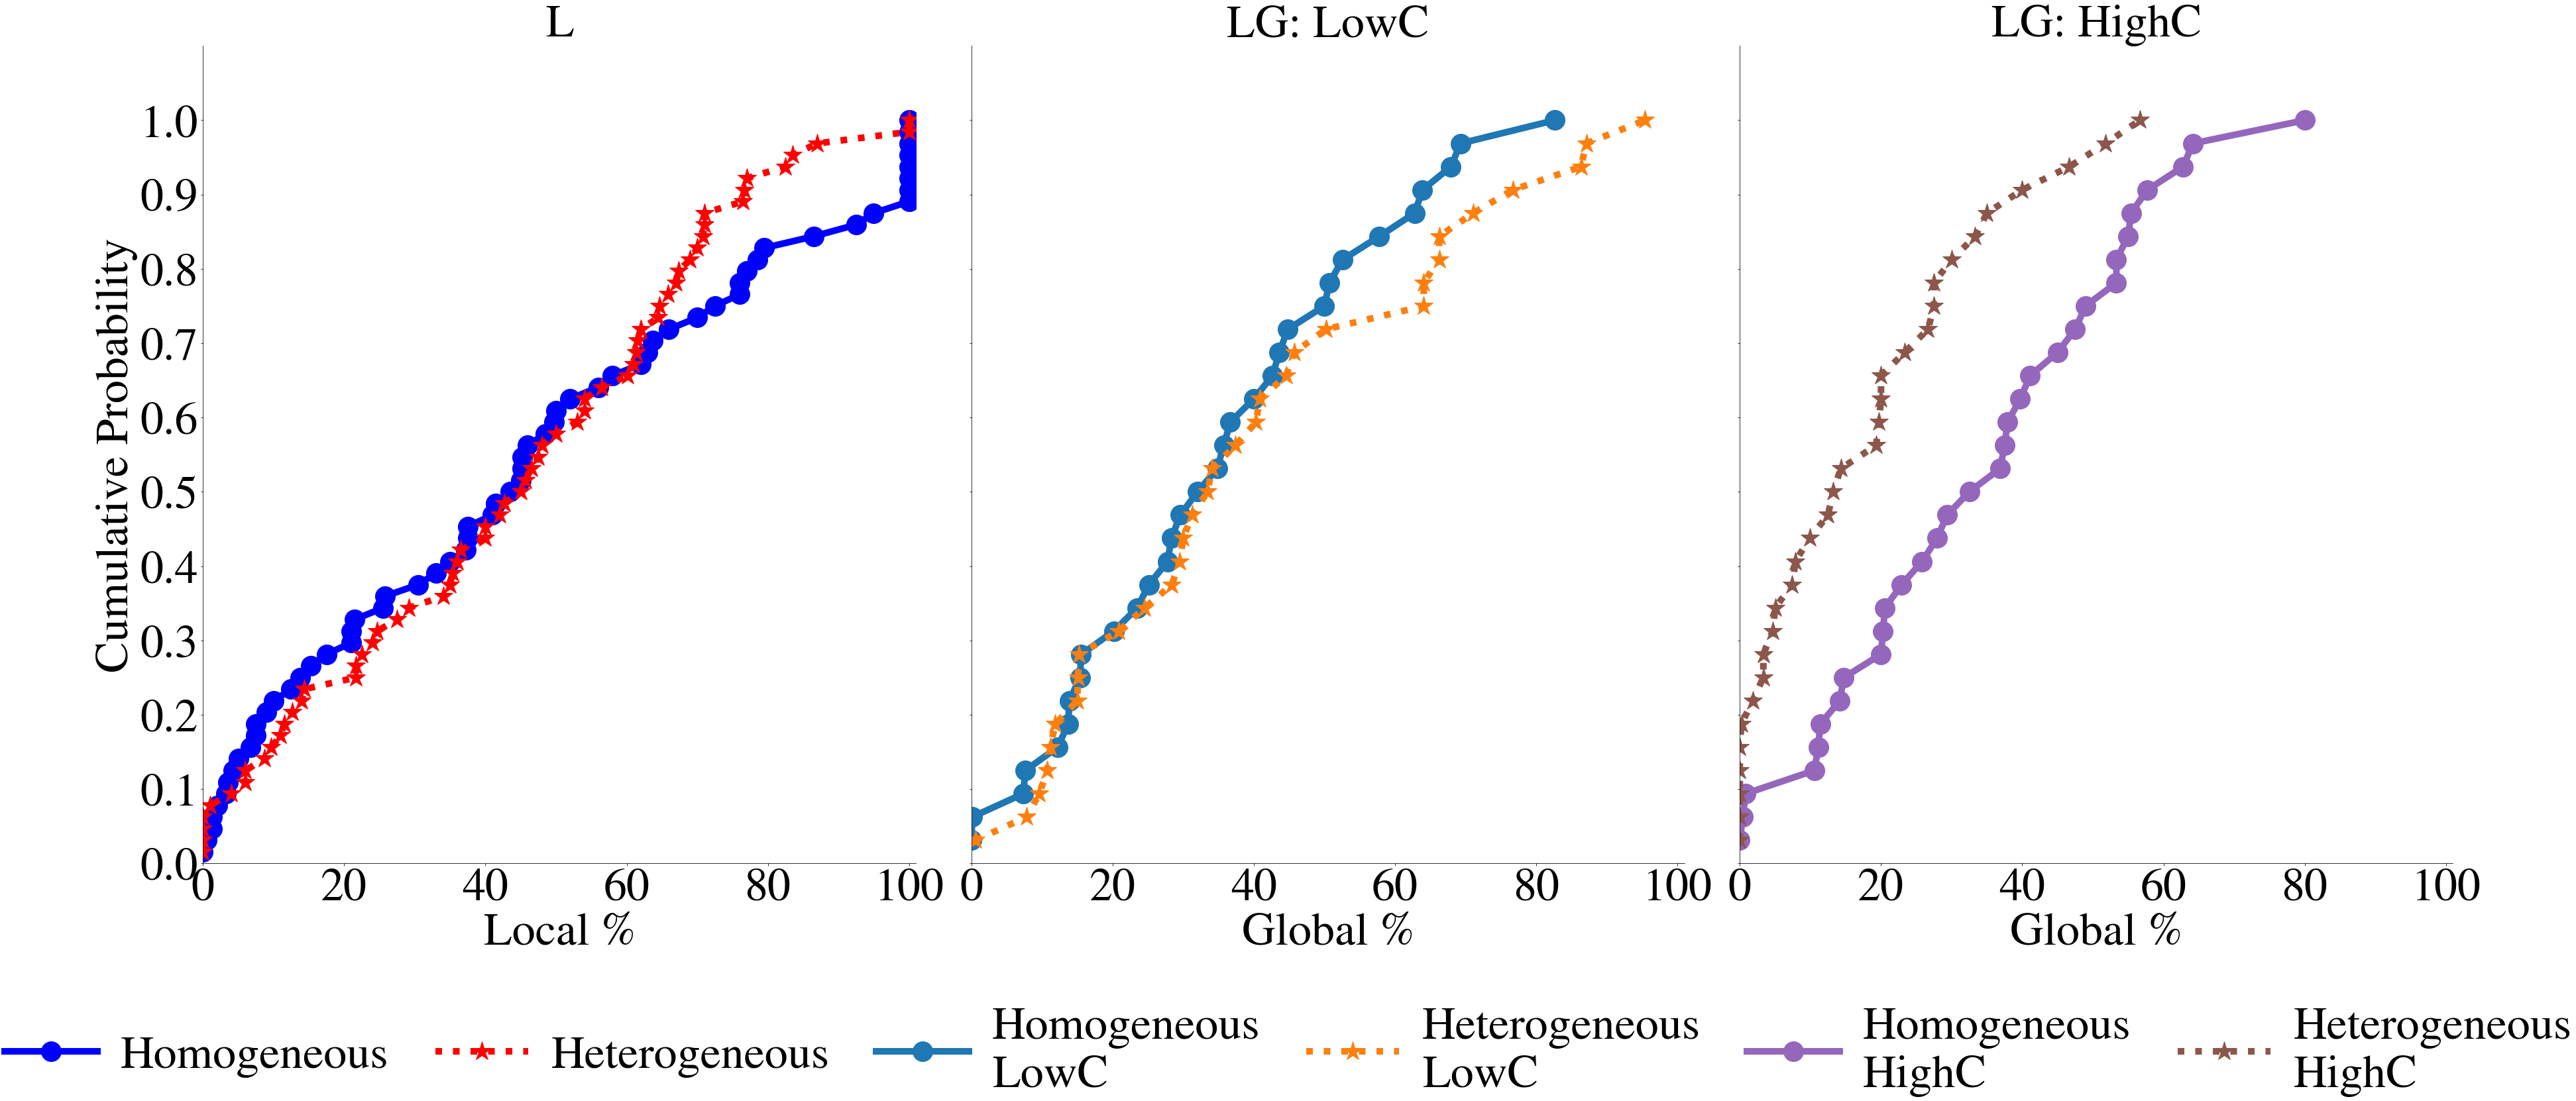

In [72]:
### This is to create the graph for all rounds
pd.set_option('plotting.backend', 'matplotlib')

fig, axes = plt.subplots(nrows=1, ncols=3,  sharex=True,  sharey=True,  
                         constrained_layout=True, figsize=(50, 20))
fig.set_constrained_layout_pads( w_pad=1 / 100)

# Defining custom 'xlim' and 'ylim' values.
custom_xlim = (0, 101)
custom_ylim = (0, 1.1)
custom_xtick =  np.arange(0,101,step=20)
custom_ytick = np.arange(0,1.1,step=.1)

plt.setp(axes[0], xticks=custom_xtick,
     yticks= custom_ytick,xlim=custom_xlim, ylim=custom_ylim)

plt.setp(axes[1], xticks=custom_xtick, 
     yticks= custom_ytick,xlim=custom_xlim, ylim=custom_ylim)

plt.setp(axes[2], xticks=custom_xtick, 
     yticks= custom_ytick,xlim=custom_xlim, ylim=custom_ylim)

custom_marker = ['o','*', 'o', '*', '*', '*']

custom_markercolor = [0,2,8,10 ]
custom_markerfacecolor = ['white', 'black','white', 'black']
custom_linestyle = ['-',':','-',':',]
label_dressed = {'HOMO':'Homogeneous',
                'HETERO': "Heterogeneous"}

# First panel is about L local contribution share distribution 
color_scheme = ['blue','red']
for i,t in enumerate(['HOMO', 'HETERO']):
    data = LocalP[LocalP['Treatment']==t]['LocalShare']
    sorted_data = np.sort(data)
    j = 15 + 2*i
    y_cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    axes[0].plot(sorted_data, y_cdf, label=label_dressed[t],marker=custom_marker[i],
                 ls = custom_linestyle[i],c=color_scheme[i], 
                 linewidth=10,  markersize=30)


# Second and third is about LG
treatment_list_r = ['Homogeneous\nLowC', 'Heterogeneous\nLowC', 'Homogeneous\nHighC', 'Heterogeneous\nHighC']
treatment_var = 'Treatment_4'

for j, yy in enumerate(treatment_list_r):
    i = j // 2 + 1
    data = GlobalP[GlobalP['Treatment_4']==yy ]['GlobalShare']
    sorted_data = np.sort(data)
    y_cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    axes[i].plot(sorted_data, y_cdf, label=yy,marker=custom_marker[j], c=palette_tab20[custom_markercolor[j]], 
                         ls=custom_linestyle[j],markerfacecolor=palette_tab20[custom_markercolor[j]],
                         linewidth=10,  markersize=30 )

axes[0].set_xlabel('Local %', fontsize=70)
axes[1].set_xlabel('Global %', fontsize=70)
axes[2].set_xlabel('Global %', fontsize=70)
axes[0].set_ylabel('Cumulative Probability', fontsize=70)
axes[0].set_title('L', fontsize=70)
axes[1].set_title('LG: LowC', fontsize=70)
axes[2].set_title('LG: HighC', fontsize=70)


for i in range(3):
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)  
    axes[i].tick_params(axis='x', labelsize=70)
    axes[i].tick_params(axis='y', labelsize=70)

# handles, labels = axes[0].get_legend_handles_labels() 

fig.legend(bbox_to_anchor=(.5,-.1), loc="center" , ncol=6 , fontsize=70,
               borderpad=0, columnspacing=1, labelspacing=.5, handletextpad=.5, frameon=False,)
fig.savefig('..\\Output\\02-Individual-Data-Jan-2023-Contribution-Shares.pdf', bbox_inches="tight" )  


In [60]:
palette_tab20[0]

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

## Add several strategies

In [5]:
data_noOppor_AllA['OtherContribution'] = data_noOppor_AllA['player.total_contribution_local']/10 - data_noOppor_AllA['player.contribution_local']

data_noOppor_AllA['OtherContribution_lagged'] = data_noOppor_AllA.groupby(['participant.code'])['OtherContribution'].shift(1)
data_noOppor_AllA['cumsum_OtherContribution_lagged'] = data_noOppor_AllA.groupby(['participant.code'])['OtherContribution_lagged'].cumsum()

data_noOppor_AllA['Self-Interest'] = 0
data_noOppor_AllA['Altruism'] = data_noOppor_AllA['endowment']
data_noOppor_AllA['1-1Conditional'] = data_noOppor_AllA['OtherContribution_lagged']/3
data_noOppor_AllA['1-2Conditional'] = data_noOppor_AllA['OtherContribution_lagged']/3/2
data_noOppor_AllA.loc[data_noOppor_AllA['1-1Conditional'].isnull(),'1-1Conditional'] = data_noOppor_AllA['player.contribution_local']
data_noOppor_AllA.loc[data_noOppor_AllA['1-2Conditional'].isnull(),'1-2Conditional'] = data_noOppor_AllA['player.contribution_local']

data_noOppor_AllA['tft'] = data_noOppor_AllA['endowment']
data_noOppor_AllA.loc[data_noOppor_AllA['OtherContribution_lagged']+data_noOppor_AllA['endowment']!=80,'tft']=0 # not exactly grim, more like TFT
data_noOppor_AllA.loc[data_noOppor_AllA['subsession.period']==1,'tft']=data_noOppor_AllA['endowment'] # not exactly grim, more like TFT

data_noOppor_AllA['grim'] = data_noOppor_AllA['endowment']
data_noOppor_AllA.loc[data_noOppor_AllA['cumsum_OtherContribution_lagged']!=(data_noOppor_AllA['subsession.period']-1)*80,'grim']=0 # not exactly grim, more like TFT
data_noOppor_AllA.loc[data_noOppor_AllA['subsession.period']==1,'grim']=data_noOppor_AllA['endowment'] # not exactly grim, more like TFT



In [6]:
 data_noOppor_AllA[['participant.code', 'subsession.period','player.total_contribution_local', 'player.contribution_local','endowment',
                    'subsession.period','OtherContribution', 'OtherContribution_lagged', 'cumsum_OtherContribution_lagged',
                    '1-1Conditional', '1-2Conditional','tft']]

,participant.code,subsession.period,player.total_contribution_local,player.contribution_local,endowment,subsession.period,OtherContribution,OtherContribution_lagged,cumsum_OtherContribution_lagged,1-1Conditional,1-2Conditional,tft
7,017z9kl5,1,220.0,2.0,10.0,1,20.0,NaN,NaN,2.000000,2.000000,10.0
71,017z9kl5,2,350.0,10.0,10.0,2,25.0,20.0,20.0,6.666667,3.333333,0.0
135,017z9kl5,3,330.0,10.0,10.0,3,23.0,25.0,45.0,8.333333,4.166667,0.0
199,017z9kl5,4,550.0,10.0,10.0,4,45.0,23.0,68.0,7.666667,3.833333,0.0
263,017z9kl5,5,380.0,10.0,10.0,5,28.0,45.0,113.0,15.000000,7.500000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1614,zz2uguoe,16,800.0,10.0,10.0,16,70.0,70.0,1255.0,23.333333,11.666667,10.0
1678,zz2uguoe,17,800.0,10.0,10.0,17,70.0,70.0,1325.0,23.333333,11.666667,10.0
1742,zz2uguoe,18,800.0,10.0,10.0,18,70.0,70.0,1395.0,23.333333,11.666667,10.0
1806,zz2uguoe,19,800.0,10.0,10.0,19,70.0,70.0,1465.0,23.333333,11.666667,10.0


In [129]:
for var in ['Self-Interest','Altruism','1-1Conditional', '1-2Conditional','tft','grim']:
    data_noOppor_AllA[var+'d'] = (data_noOppor_AllA[var]-data_noOppor_AllA['player.contribution_local'])**2

In [130]:
# data_noOppor_AllA['Sequence'].unique()
# Subject_agg['participant.code'].unique()
data_noOppor_AllA[data_noOppor_AllA['participant.code']=='t3sugr4n'][['participant.code','Sequence', 'subsession.period','player.total_contribution_local', 'player.contribution_local','endowment',
                    'subsession.period','OtherContribution', 'OtherContribution_lagged', 'cumsum_OtherContribution_lagged',
                    '1-1Conditional', '1-2Conditional','tft','grim']]

,participant.code,Sequence,subsession.period,player.total_contribution_local,player.contribution_local,endowment,subsession.period,OtherContribution,OtherContribution_lagged,cumsum_OtherContribution_lagged,1-1Conditional,1-2Conditional,tft,grim
12,t3sugr4n,A1,1,320.0,0.0,10.0,1,32.0,NaN,NaN,0.000000,0.000000,10.0,10.0
76,t3sugr4n,A1,2,270.0,0.0,10.0,2,27.0,32.0,32.0,10.666667,5.333333,0.0,0.0
140,t3sugr4n,A1,3,210.0,1.0,10.0,3,20.0,27.0,59.0,9.000000,4.500000,0.0,0.0
204,t3sugr4n,A1,4,170.0,0.0,10.0,4,17.0,20.0,79.0,6.666667,3.333333,0.0,0.0
268,t3sugr4n,A1,5,410.0,1.0,10.0,5,40.0,17.0,96.0,5.666667,2.833333,0.0,0.0
332,t3sugr4n,A1,6,310.0,2.0,10.0,6,29.0,40.0,136.0,13.333333,6.666667,0.0,0.0
396,t3sugr4n,A1,7,290.0,1.0,10.0,7,28.0,29.0,165.0,9.666667,4.833333,0.0,0.0
460,t3sugr4n,A1,8,270.0,0.0,10.0,8,27.0,28.0,193.0,9.333333,4.666667,0.0,0.0
524,t3sugr4n,A1,9,200.0,0.0,10.0,9,20.0,27.0,220.0,9.000000,4.500000,0.0,0.0
588,t3sugr4n,A1,10,170.0,1.0,10.0,10,16.0,20.0,240.0,6.666667,3.333333,0.0,0.0


In [131]:
# Subject_agg = Subject_agg.reset_index()
# Subject_agg.loc[Subject_agg['participant.code']=='16frgsbs']

In [132]:
Subject_agg = data_noOppor_AllA.groupby(['participant.code']).sum()
# ['Self-Interestd', 'Altruismd','1-1Conditionald', '1-2Conditionald','tftd','grimd']
Subject_agg_type = Subject_agg[['Self-Interestd', 'Altruismd','1-1Conditionald', '1-2Conditionald','grimd']]
Subject_agg_type['min']=Subject_agg_type.min(axis=1)
for var in ['Self-Interestd', 'Altruismd','1-1Conditionald', '1-2Conditionald','grimd']:
    Subject_agg_type['Type'+var] = (Subject_agg_type[var]==Subject_agg_type['min'])*1

Subject_agg_type.to_csv('..\\ProcessedData\\individual_type_allInfor.csv',index=True)

C:\Users\xinxi\AppData\Local\Temp/ipykernel_43320/4234364711.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Subject_agg_type['min']=Subject_agg_type.min(axis=1)
C:\Users\xinxi\AppData\Local\Temp/ipykernel_43320/4234364711.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Subject_agg_type['Type'+var] = (Subject_agg_type[var]==Subject_agg_type['min'])*1


In [133]:
Subject_agg = data_noOppor_AllA[data_noOppor_AllA['Sequence']!='A2'].groupby(['participant.code']).sum()
# ['Self-Interestd', 'Altruismd','1-1Conditionald', '1-2Conditionald','tftd','grimd']
Subject_agg_type = Subject_agg[['Self-Interestd', 'Altruismd','1-1Conditionald', '1-2Conditionald','grimd']]
Subject_agg_type['min']=Subject_agg_type.min(axis=1)
for var in ['Self-Interestd', 'Altruismd','1-1Conditionald', '1-2Conditionald','grimd']:
    Subject_agg_type['Type'+var] = (Subject_agg_type[var]==Subject_agg_type['min'])*1

Subject_agg_type.to_csv('..\\ProcessedData\\individual_type.csv',index=True)

C:\Users\xinxi\AppData\Local\Temp/ipykernel_43320/964280755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Subject_agg_type['min']=Subject_agg_type.min(axis=1)
C:\Users\xinxi\AppData\Local\Temp/ipykernel_43320/964280755.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Subject_agg_type['Type'+var] = (Subject_agg_type[var]==Subject_agg_type['min'])*1


In [134]:
# Strategy: 

#  Use A2 to check robustness
Subject_agg = data_noOppor_AllA[data_noOppor_AllA['Sequence']=='A2'].groupby(['participant.code']).sum()
# ['Self-Interestd', 'Altruismd','1-1Conditionald', '1-2Conditionald','tftd','grimd']
Subject_agg_type = Subject_agg[['Self-Interestd', 'Altruismd','1-1Conditionald', '1-2Conditionald','grimd']]
Subject_agg_type['min']=Subject_agg_type.min(axis=1)
for var in ['Self-Interestd', 'Altruismd','1-1Conditionald', '1-2Conditionald','grimd']:
    Subject_agg_type['Type'+var] = (Subject_agg_type[var]==Subject_agg_type['min'])*1

Subject_agg_type.to_csv('..\\ProcessedData\\individual_typeA2.csv',index=True)

C:\Users\xinxi\AppData\Local\Temp/ipykernel_43320/1541513811.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Subject_agg_type['min']=Subject_agg_type.min(axis=1)
C:\Users\xinxi\AppData\Local\Temp/ipykernel_43320/1541513811.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Subject_agg_type['Type'+var] = (Subject_agg_type[var]==Subject_agg_type['min'])*1
